# Assignment # 6 : Probability of texting.
## Data Science 350
In this assignment I am applying Bayes theorem to predict the probability of texting at a local intersection by creating a model based on national data provided in this assignment.
* Following libraries have been added for this assignment.
    - LearnBayes
    - repr
* Following **national observations** have been used to calculate the coefficients(**<span style="color:red">a= 0.41, b = 1.73</span>**) of **beta prior** distribution.
     - P = 0.5, at x = 0.1
     - P = 0.75 at x = 0.3
* Following **local observations** have been used to calculate the coefficients(<span style="color:red">After applying all three observations, **a = 7.41, b = 54.73</span>**) of **beta posterior** distribution from the beta prior.
     - 2 texting out of 20 drivers
     - 4 texting out of 20 drivers
     - 1 texting out of 20 drivers
* I am plotting all the observations using triplot function of LearnBayes package.
     - On this plot, one can observe the "Prior", "Likelihood" & Posterior.
* We now have a working model which we can use for simulation to calculate the HDI.
* In order to compare these local observations with national observations I am also simulating the model created by national numbers.
* I am also using the predplot function to test the local model, I am unable to do this for national as I do not have any recorded observation data for this plotting.
* Based on the individual models we can clearly see **<span style="color:red">local drivers are driving more responsibily</span>**.
     - Locally we can see out of 100, 4 to 20 drivers are texting 90% of the time.
     - Nationally we can see out of 100, 0 to 55 drivers are texting 90% of the time.

## Function Description
In this part of the function I am clearing all the objects, console, loading the required packages used in this script and computing beta prior by using beta.select function from LearnBayes package.
Beta prior from these national observations will be used to create the model for local drivers. This beta prior distrbution will also be used as a national model for comparing the local numbers.

In [11]:
# Clear objects from Memory
rm(list=ls())
# Clear Console:
cat("\014")

library(LearnBayes)
library(repr)
# Compute the beta prior for the driver texting at a specific intersection on the national average.
beta.par <- beta.select(list(p=0.5, x=0.1), list(p=0.75, x=0.3))
#Paremeters of beta prior distribution.
beta.par
options(repr.plot.width=6, repr.plot.height=5)

[1] 0.41 1.73

## Plot the prior with various observations of local data.
Here I am using triplot function from LearnBayes package to visualize following observations.
* No data, there are no observations to add to the model, hence the local model cannot predict anything at this point.
    - You can clearly see a flat line for likelihood and overlapping prior and posterior lines.
* 2 out of 20 drivers texting, first set observations will now start forming the model.
    - We can now see likelihood taking a form of posterior.
* 4 out of 20 drivers texting, model is now getting stronger with more observations.
    - With more data likelihood and posterior are getting closer to each other. 
* 1 out of 20 drivers texting, we now have a very strong model.
    - **Both these curves are now almost overlapping**.
* **<span style="color:red">After applying all three observations, coefficient comes out to be (a = 7.41, b = 54.73)</snap>**

As expected there is no change in prior curve in all the plots.

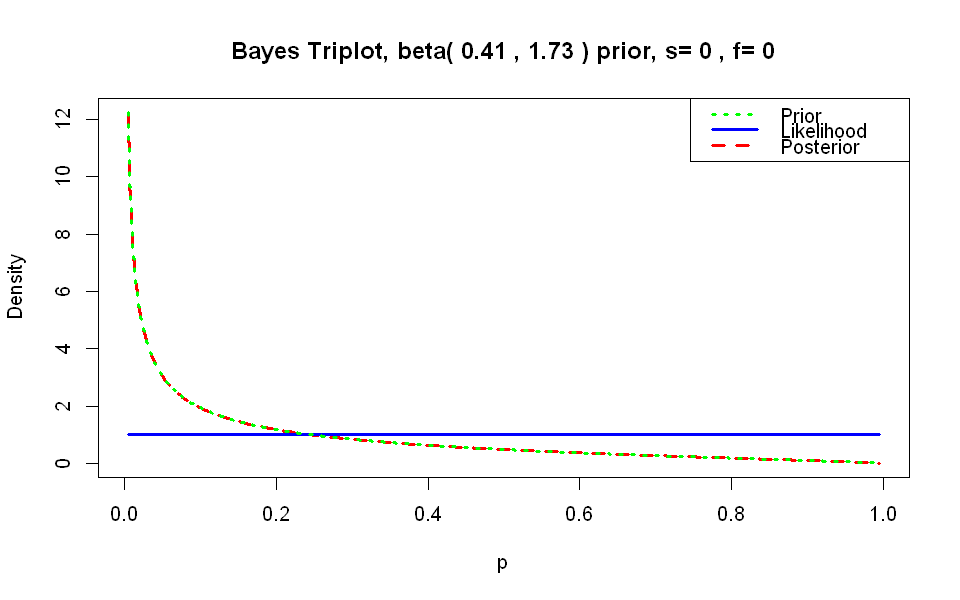

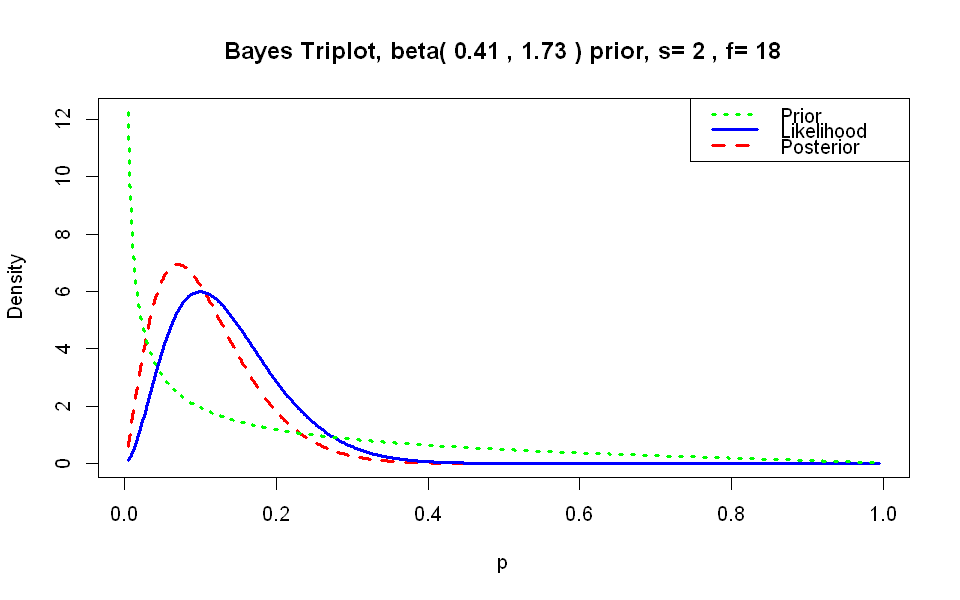

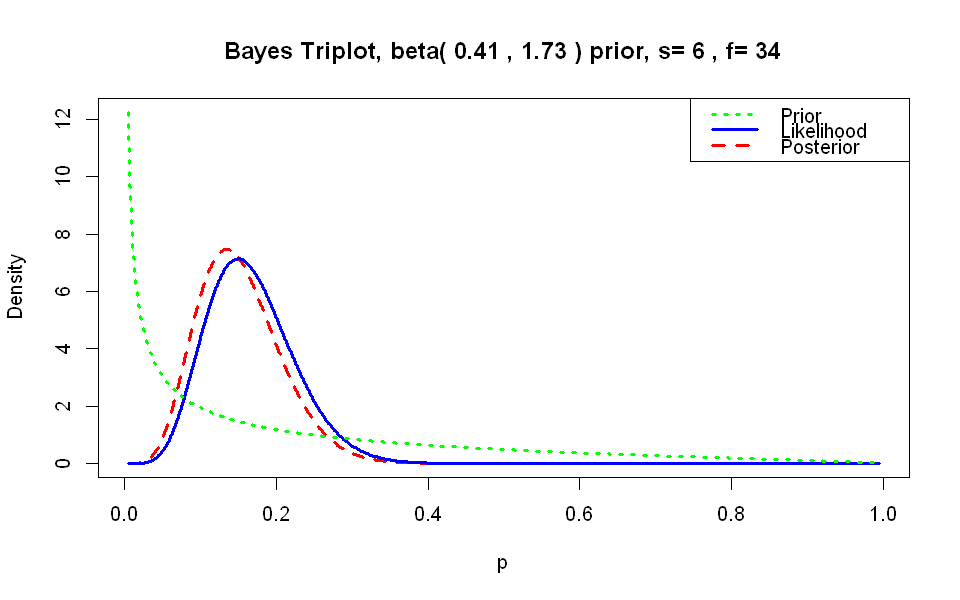

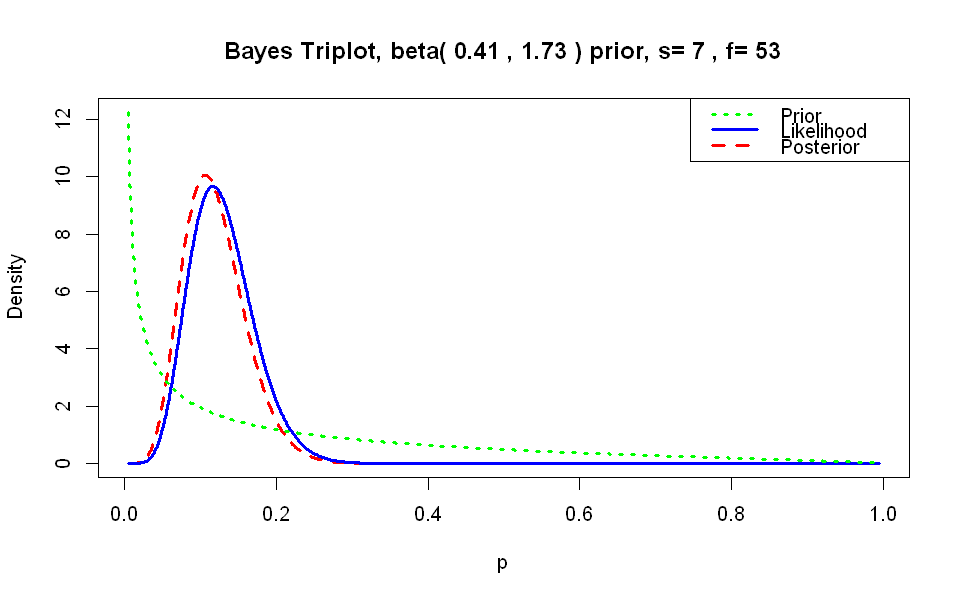

In [23]:
#Plot the prior with no data.
triplot(beta.par, c(0, 0))
#Plot the prior, likelihood and posterior three times as you update your belief based on collecting more data
#Compute posterior with the below observations.
# 2 out of 20 drivers texting.
beta.par218 <- beta.par + c(2, 18)
triplot(beta.par, c(2, 18))
# 4 out of 20 drivers texting.
beta.par634 <- beta.par + c(6, 34)
triplot(beta.par, c(6, 34))
# 1 out of 20 drivers texting.
beta.par753 <- beta.par + c(7, 53)
triplot(beta.par, c(7, 53))

## Simulate the <span style="color:red">local </span> model.
* I am now creating a random beta sample of 10000 values based on the **final posterior** model and using it to simulate this model.
    - I am calculating quantiles at 5 % and 95 % which I will be using to calculate and show the 90% HDI on the histogram. 
    - I am generating a vector using the seq function with 50 values and taking its min and max value to calculate the break points of the histogram.
    - I am plotting a histogram to visually show this simulation
    - I am also creating the QQ plot to check the theoritcal normality. You can validate a fairly straight line to confirm that theoritical quantiles are matching sample quantiles.

5%        95% 
0.05896829 0.19315212

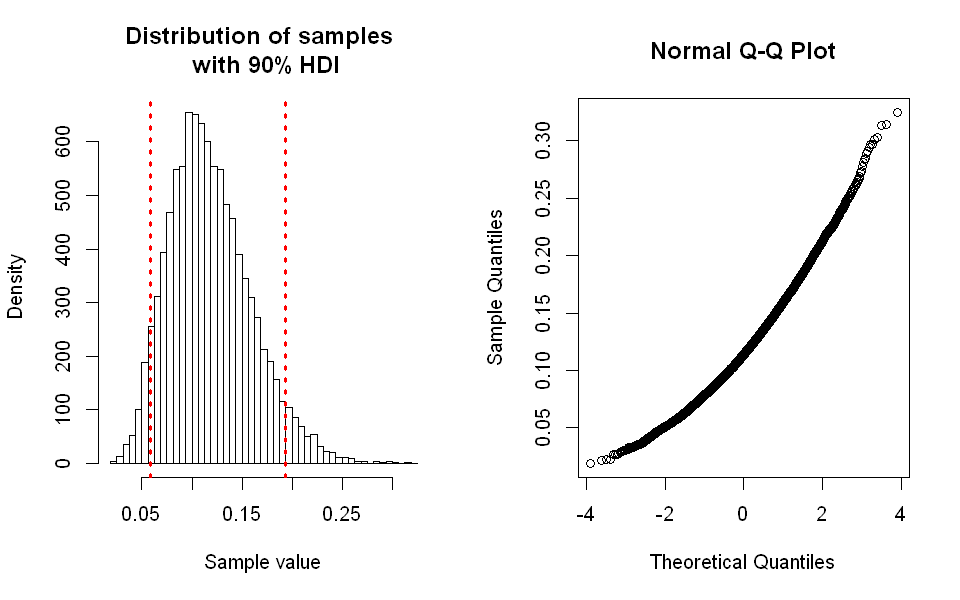

In [20]:
# Simulate the final posterior distribution
options(repr.plot.width=8, repr.plot.height=5)
beta.post.par <- beta.par + c(7, 53)
post.sample <- rbeta(10000, beta.post.par[1], beta.post.par[2])
par(mfrow = c(1,2))
quants = quantile(post.sample, c(0.05, 0.95))
breaks = seq(min(post.sample), max(post.sample), length.out = 50)
#Plot the posterior with the 90% HDI shown
hist(post.sample, breaks = breaks, 
     main = 'Distribution of samples \n with 90% HDI',
     xlab = 'Sample value',
     ylab = 'Density')
abline(v = quants[1], lty = 3, col = 'red', lwd = 3)
abline(v = quants[2], lty = 3, col = 'red', lwd = 3)
qqnorm(post.sample)
par(mfrow = c(1,1))
#Report the upper and lower limits of the 90% HDI
quants

## Simulate the <span style="color:red">national</span> model.
* I am now creating a random beta sample of 10000 values based on the **prior** model and using it to simulate this model.
    - I am calculating quantiles at 5 % and 95 % which I will be using to calculate and show the 90% HDI on the histogram. 
    - I am generating a vector using the seq function with 50 values and taking its min and max value to calculate the break points of the histogram.
    - I am plotting a histogram to visually show this simulation
    - I am also creating the QQ plot to check the theoretical normality, as you can see it does have tails on both ends, with the tail at the start being very prominent, this is also confirmed by approximately zero quantile(0.000353104706663383) at 5 %.

5%          95% 
0.0003957238 0.6837959242

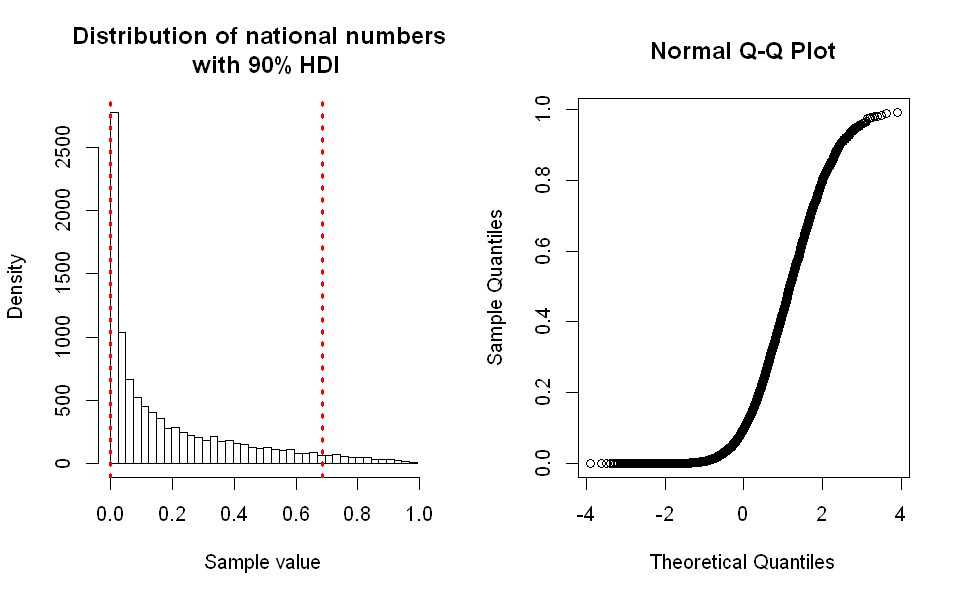

In [21]:
# Simulate the national numbers
options(repr.plot.width=8, repr.plot.height=5)
beta.nat <- beta.par
nat.sample <- rbeta(10000, beta.nat[1], beta.nat[2])
par(mfrow = c(1,2))
quantsnat = quantile(nat.sample, c(0.05, 0.95))
breaks = seq(min(nat.sample), max(nat.sample), length.out = 41)
#Plot the natinal numbers with the 90% HDI shown
hist(nat.sample, breaks = breaks, 
     main = 'Distribution of national numbers \n with 90% HDI',
     xlab = 'Sample value',
     ylab = 'Density')
abline(v = quantsnat[1], lty = 3, col = 'red', lwd = 3)
abline(v = quantsnat[2], lty = 3, col = 'red', lwd = 3)
qqnorm(nat.sample)
par(mfrow = c(1,1))
#Report the upper and lower limits of the 90% HDI
quantsnat

## Check Local Model.
- I am now using predplot function to plot the predictive distribution for binomial sampling with a beta prior.
- For local, I am going to use the prior calculated from the supplied data and run it against 60 observations with 7 successes.
    - You can validate yobs(Number of success) on the lower end of the observations and this matches the supplied observations.

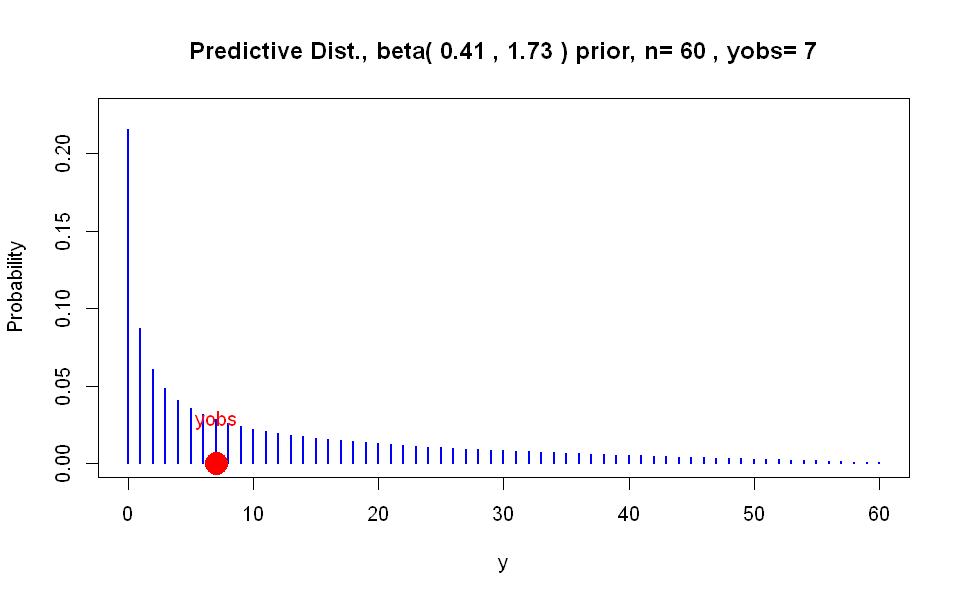

In [30]:
## Check the model based on local observations.
# sample size = 60
# Observed number of successes yobs 7(2+4+1).
predplot(beta.par, 60, 7)

## In a group of 100 forecast the number of texting local and national drivers.
- I am now using pbetap function to compute the predictive distribution for a binomial sample with a beta prior.
    - For **local model**, I am using the **posterior** as this data is available in the assignment.
    - For **national model**, I am using the **prior** as this data is available for computation.
- Posterior predictive distribution is then plotted on a histogram.
- Finally, using discint function to compue the highest probability interval for this distribution.
    - Locally,data tells me that **<span style="color:red">4 to 20 drivers are texting 90 %</span>** of the time.
    - Nationally, data tells me that **<span style="color:red">0 to 55 drivers are texting 90%</span>**  of the time.

$prob
[1] 0.9098956

$set
 [1]  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20

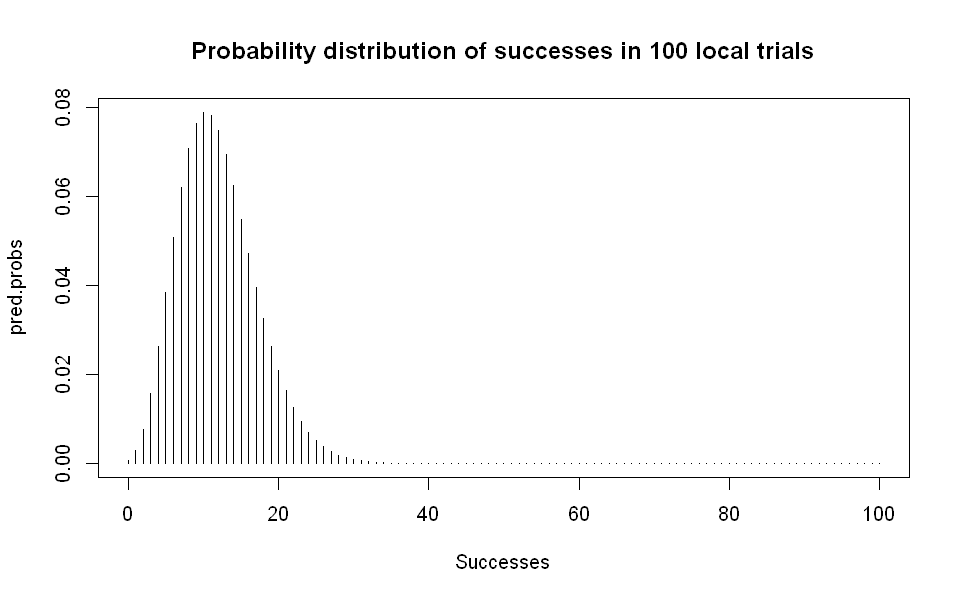

$prob
[1] 0.9038973

$set
 [1]  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
[26] 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
[51] 50 51 52 53 54 55

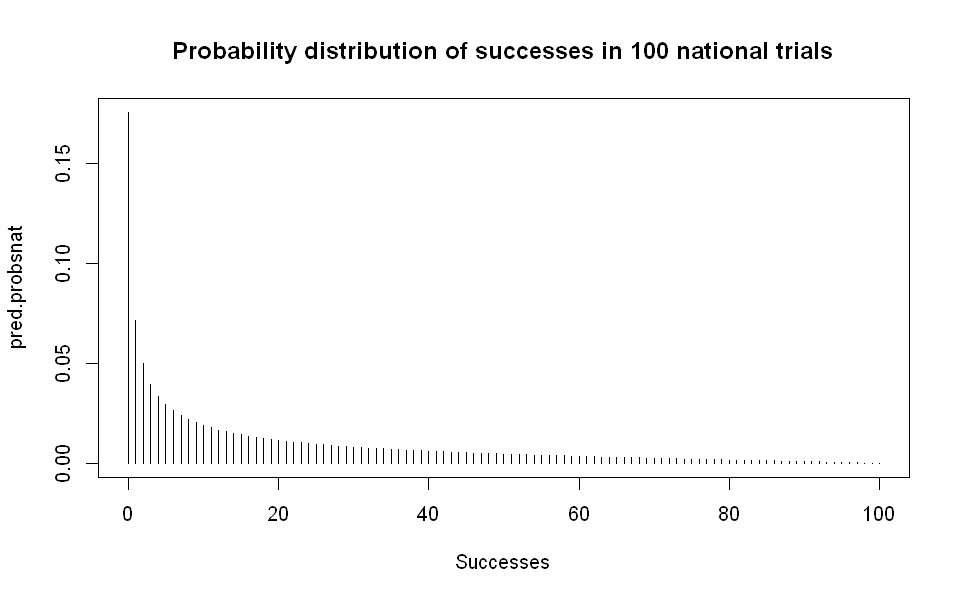

In [31]:
# Using this model forecast the number of drivers texting locally in a group of 100.
n <- 100
s <- 0:n
pred.probs <- pbetap(beta.post.par, n, s)#Using posterior as the observations are available.
plot(s, pred.probs, type="h", 
     main = paste('Probability distribution of successes in', as.character(n), 'local trials'),
     xlab = 'Successes')
discint(cbind(s, pred.probs), 0.90)

# Using this model forecast the number of drivers texting nationally in a group of 100.
n <- 100
s <- 0:n
pred.probsnat <- pbetap(beta.nat, n, s)#Using prior as this is what we have available at this point.
plot(s, pred.probsnat, type="h", 
     main = paste('Probability distribution of successes in', as.character(n), 'national trials'),
     xlab = 'Successes')
discint(cbind(s, pred.probsnat), 0.90)